In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [5]:
data = pd.read_csv("diabetes.csv")

data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.columns
data.isnull().sum()


Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [7]:
x = data.drop('Outcome', axis=1)
y = data['Outcome']


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
KNN = classifier.fit(x_train, y_train)


In [11]:
prediction = KNN.predict(x_test)


C:\Users\Bhargavi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [12]:
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))


              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154



In [13]:
cm = metrics.confusion_matrix(y_test, prediction)
print(cm)


[[79 20]
 [27 28]]


<AxesSubplot:>

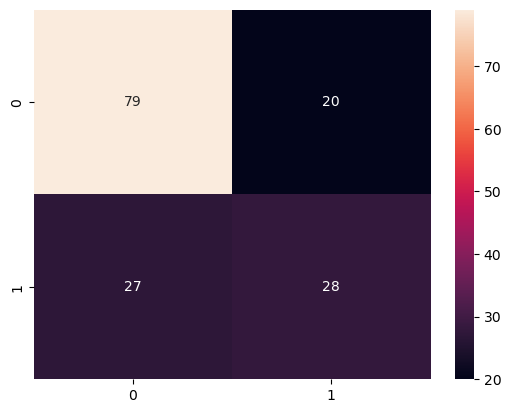

In [14]:
sns.heatmap(cm, annot=True)


In [15]:
print("accuracy:", metrics.accuracy_score(y_test, prediction))
print("error rate:", 1 - metrics.accuracy_score(y_test, prediction))
print("precision:", metrics.precision_score(y_test, prediction))
print("recall:", metrics.recall_score(y_test, prediction))


accuracy: 0.6948051948051948
error rate: 0.30519480519480524
precision: 0.5833333333333334
recall: 0.509090909090909
